# Klasifikasi Risiko Diabetes Menggunakan hyperparameter pada klasifikasi Random Forest weight class pada Dataset Pima Indians Diabetes 

In [126]:
# %pip install pandas numpy scikit-learn
# %pip install matplotlib
# %pip install seaborn

In [127]:
import warnings
warnings.filterwarnings('ignore')

## Ekploratori Data Analisis

In [128]:
import pandas as pd 
import numpy as np

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Missing Value

In [129]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
df.drop(['Pregnancies', 'Outcome', 'DiabetesPedigreeFunction'], axis=1)[df == 0].count()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Age                0
dtype: int64

### Duplikat

In [131]:
df.duplicated().sum()

np.int64(0)

### Deskripsi

In [132]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Penyebaran Data

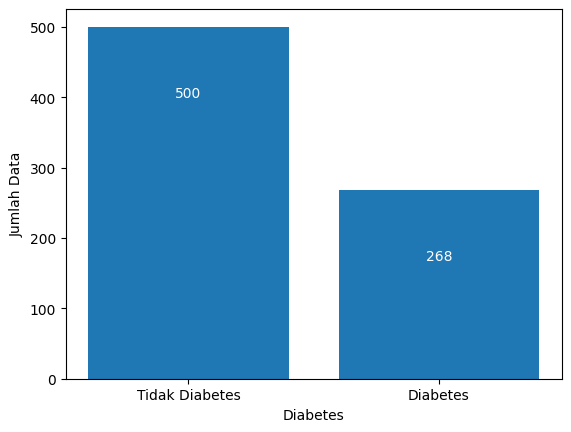

In [133]:
import matplotlib.pyplot as plt

jumlah = [df[df['Outcome'] == 0].count()['Outcome'], df[df['Outcome'] == 1].count()['Outcome']]

plt.bar(['Tidak Diabetes', 'Diabetes'], jumlah)

plt.xlabel('Diabetes')
plt.ylabel('Jumlah Data')

for i, v in enumerate(jumlah):
    plt.text(i, v - 100, str(v), color='white', horizontalalignment='center')


plt.show()

### Korelasi Data

#### Glukosa Vs Outcome

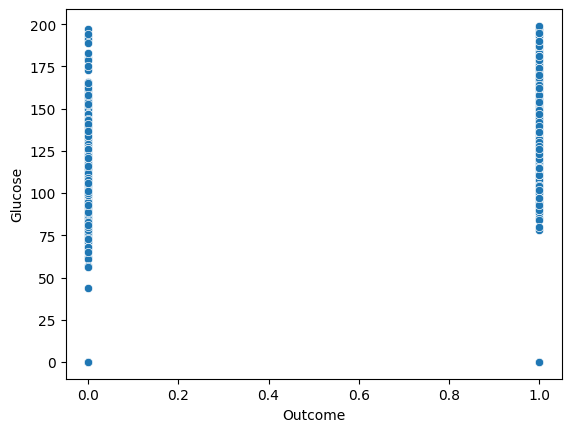

141.25746268656715
109.98


In [134]:
import seaborn as sns

sns.scatterplot(x='Outcome', y='Glucose', data=df)

plt.show()

rata_rata_gula_darah_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
rata_rata_gula_darah_tidak_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()

print(rata_rata_gula_darah_diabetes)
print(rata_rata_gula_darah_tidak_diabetes)

#### Pregnancies Vs Outcome

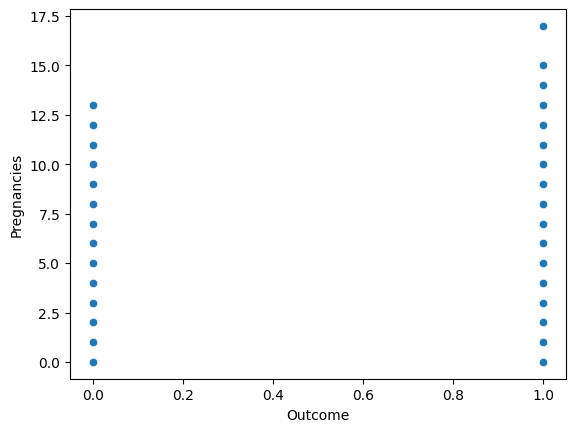

4.865671641791045
3.298


In [135]:
sns.scatterplot(x='Outcome', y='Pregnancies', data=df)

plt.show()

rata_rata_kehamilan_diabetes = df[df['Outcome'] == 1]['Pregnancies'].mean()
rata_rata_kehamilan_tidak_diabetes = df[df['Outcome'] == 0]['Pregnancies'].mean()

print(rata_rata_kehamilan_diabetes)
print(rata_rata_kehamilan_tidak_diabetes)

#### BloodPressure Vs Outcome

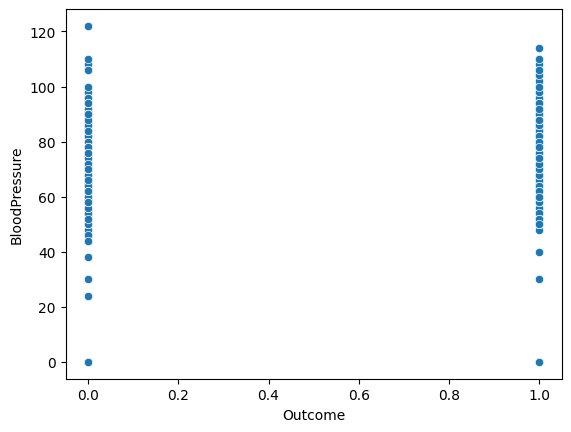

70.82462686567165
68.184


In [136]:
sns.scatterplot(x='Outcome', y='BloodPressure', data=df)

plt.show()

rata_rata_tekanan_darah_diabetes = df[df['Outcome'] == 1]['BloodPressure'].mean()
rata_rata_tekanan_darah_tidak_diabetes = df[df['Outcome'] == 0]['BloodPressure'].mean()

print(rata_rata_tekanan_darah_diabetes)
print(rata_rata_tekanan_darah_tidak_diabetes)

#### SkinThickness Vs Outcome

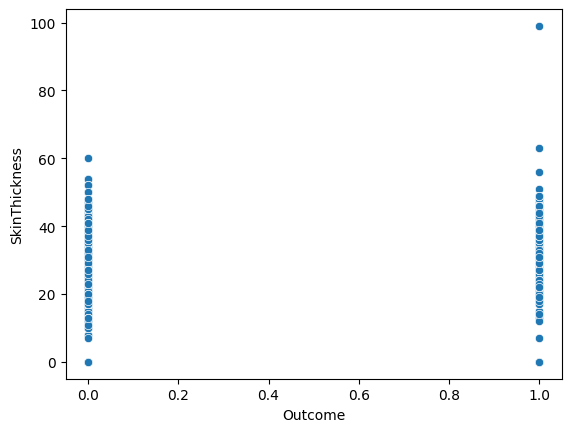

22.16417910447761
19.664


In [137]:
sns.scatterplot(x='Outcome', y='SkinThickness', data=df)

plt.show()

rata_rata_skin_thickness_diabetes = df[df['Outcome'] == 1]['SkinThickness'].mean()
rata_rata_skin_thickness_tidak_diabetes = df[df['Outcome'] == 0]['SkinThickness'].mean()

print(rata_rata_skin_thickness_diabetes)
print(rata_rata_skin_thickness_tidak_diabetes)

#### BMI Vs Outcome

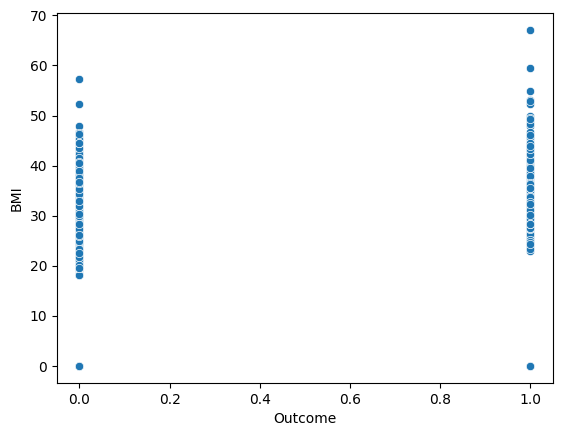

35.14253731343284
30.3042


In [138]:
sns.scatterplot(x='Outcome', y='BMI', data=df)

plt.show()

rata_rata_bmi_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
rata_rata_bmi_tidak_diabetes = df[df['Outcome'] == 0]['BMI'].mean()

print(rata_rata_bmi_diabetes)
print(rata_rata_bmi_tidak_diabetes)

#### DPF Vs Outcome

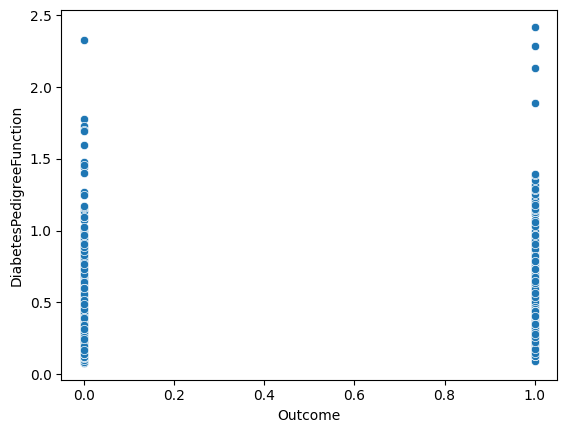

0.5505
0.42973400000000006


In [139]:
sns.scatterplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)

plt.show()

rata_rata_dpf_diabetes = df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].mean()
rata_rata_dpf_tidak_diabetes = df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].mean()

print(rata_rata_dpf_diabetes)
print(rata_rata_dpf_tidak_diabetes)

#### Age Vs Outcome

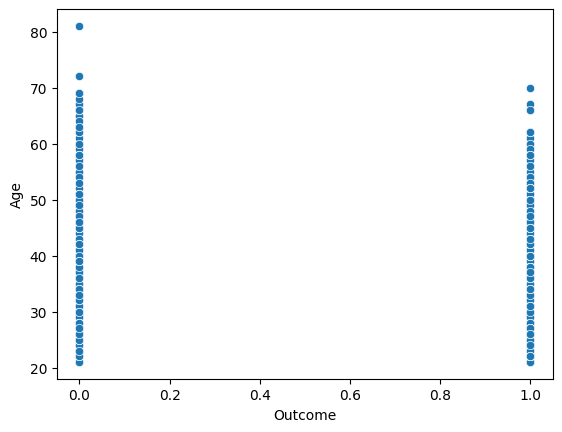

37.06716417910448
31.19


In [140]:
sns.scatterplot(x='Outcome', y='Age', data=df)

plt.show()

rata_rata_age_diabetes = df[df['Outcome'] == 1]['Age'].mean()
rata_rata_age_tidak_diabetes = df[df['Outcome'] == 0]['Age'].mean()

print(rata_rata_age_diabetes)
print(rata_rata_age_tidak_diabetes)

### Deteksi Outlier

In [141]:
df.shape

(768, 9)

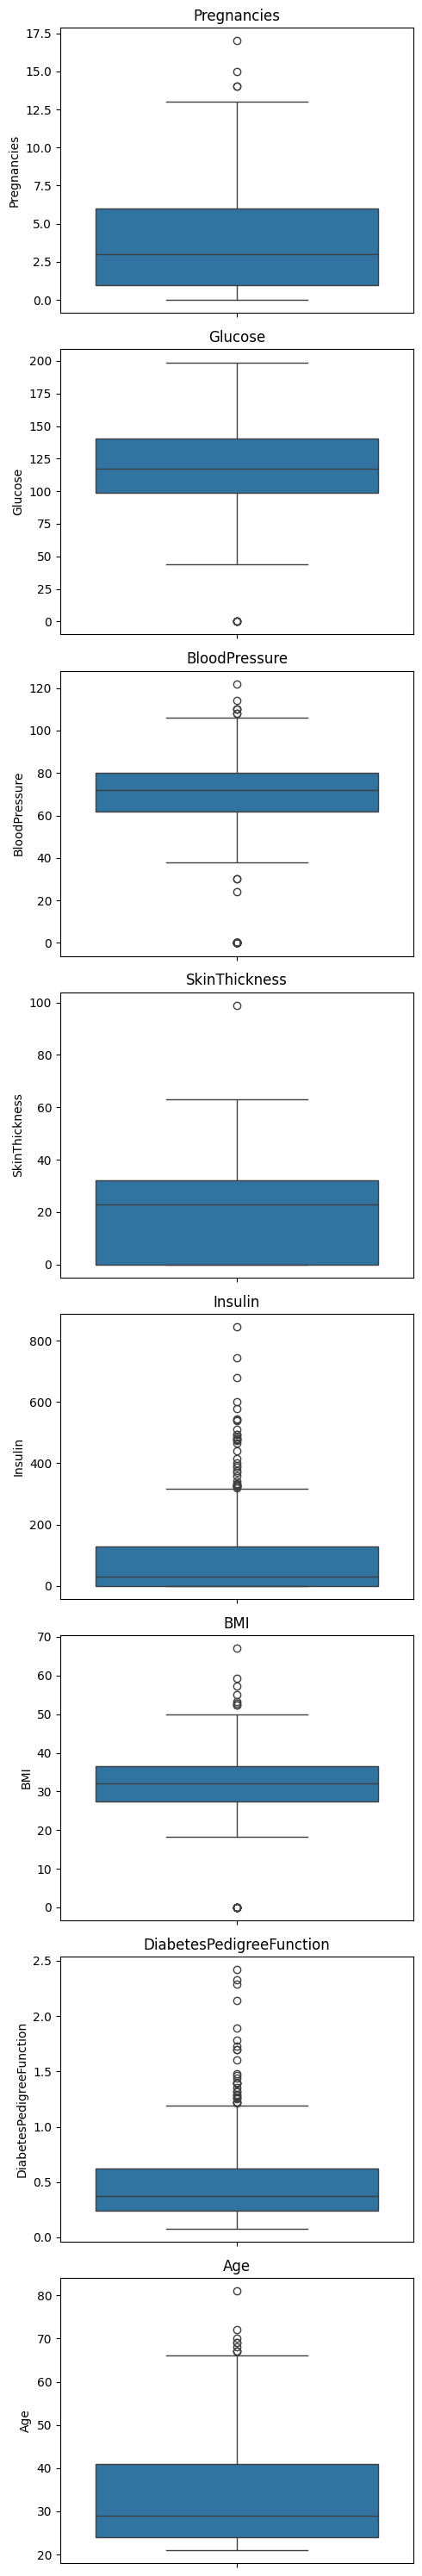

In [142]:
fig, axes = plt.subplots(
    nrows=8,
    ncols=1,
    figsize=(5, 30)
)

columns = df.columns.copy().drop("Outcome").to_list()
for i, kolom in enumerate(columns):
    # print(kolom)
    sns.boxplot(y=df[kolom], ax=axes[i])
    axes[i].figure 

    axes[i].set_title(kolom)

plt.tight_layout()
plt.show()


### Heatmap correlation

<Axes: >

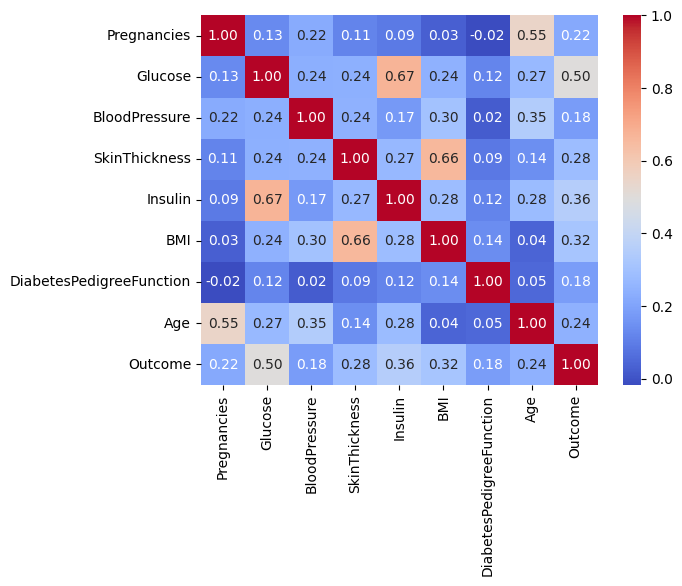

In [146]:
matrix_corelation = df.corr()

sns.heatmap(
    matrix_corelation,
    cmap='coolwarm',
    fmt='.2f',
    annot=True
)

## Preprocessing

### Penanganan Missing Value

In [143]:
from sklearn.impute import KNNImputer

cols_with_zero_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_nan] = df[cols_with_zero_as_nan].replace(0, np.nan)


imputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean'
)

imputed_data = imputer.fit_transform(df)

df = pd.DataFrame(imputed_data, columns=df.columns)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,165.941157,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,60.705334,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.111667,172.186312,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


### Penanganan Outlier

In [144]:
for kolom in columns:

    Q1 = np.percentile(df[kolom], 25, interpolation='midpoint')
    Q3 = np.percentile(df[kolom], 75, interpolation='midpoint')

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[kolom][df[kolom] < lower_bound] = lower_bound
    df[kolom][df[kolom] > upper_bound] = upper_bound
    


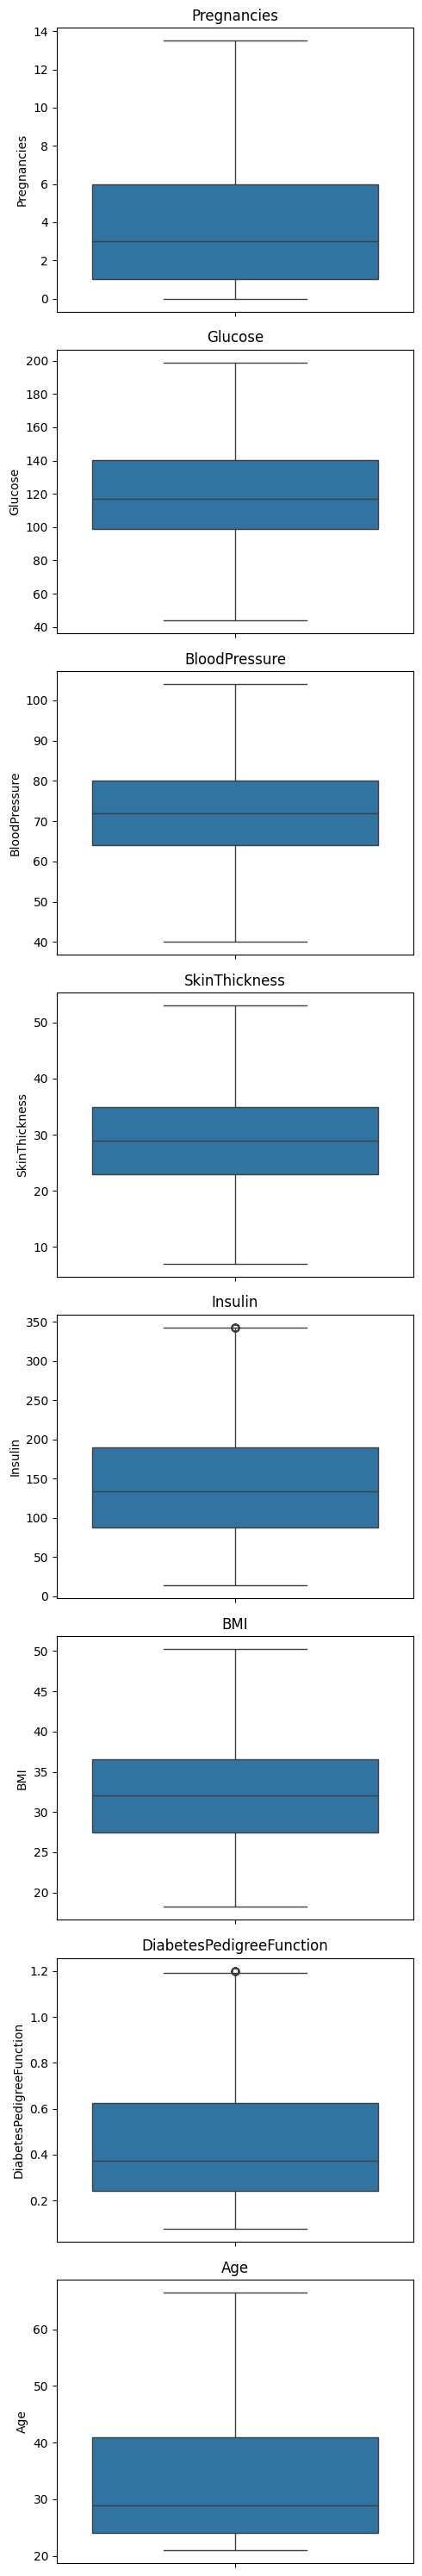

In [145]:
fig, axes = plt.subplots(
    nrows=8,
    ncols=1,
    figsize=(5, 30)
)

for i, kolom in enumerate(columns):
    # print(kolom)
    sns.boxplot(y=df[kolom], ax=axes[i])
    axes[i].figure 

    axes[i].set_title(kolom)


plt.tight_layout()
plt.show()

## Modeling

In [151]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# --- 1. Persiapan Data Contoh (Gantilah dengan X_train, X_test, y_train, y_test Anda) ---
# Misal, Anda sudah memuat dan membagi data Anda menjadi:
# X_train, X_test, y_train, y_test

# Membuat data dummy untuk ilustrasi:
# (Gantilah bagian ini dengan data Anda yang sudah dibagi)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# -------------------------------------------------------------------------------------

# --- 2. Membuat Pipeline ---
# Pipeline menggabungkan penskalaan (Scaler) dan model (RF Classifier)
pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Langkah 1: Penskalaan Z-Score
    ('rf', RandomForestClassifier(random_state=42)) # Langkah 2: Model Random Forest
])

# --- 3. Mendefinisikan Ruang Hyperparameter (Distribusi) ---
# Kita perlu mendefinisikan nama parameter dengan format: 'nama_langkah__nama_parameter'
param_dist = {
    'rf__n_estimators': randint(50, 500),  # Jumlah pohon dalam forest
    'rf__max_depth': randint(3, 20),      # Kedalaman maksimum pohon
    'rf__min_samples_split': randint(2, 20), # Jumlah minimum sampel untuk membagi node
    'rf__criterion': ['gini', 'entropy'],
    'rf__class_weight': [None, 'balanced']
}

# --- 4. Hyperparameter Tuning dengan RandomizedSearchCV ---
# n_iter: Jumlah iterasi/kombinasi yang dicoba
# cv: Jumlah lipatan (folds) untuk Cross-Validation
# verbose: Untuk menampilkan proses
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Coba 20 kombinasi parameter secara acak
    cv=5,       # 5-fold Cross-Validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Menggunakan semua core CPU
    verbose=2
)

# Fit (latih) model menggunakan Randomized Search pada data pelatihan
random_search.fit(X_train, y_train)

# --- 5. Evaluasi Hasil ---
# Model terbaik ditemukan dan di-fit ulang secara otomatis oleh random_search
best_model = random_search.best_estimator_

# Prediksi pada data uji
y_pred_tuned = best_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_tuned)

# --- Hasil Tuning ---
print('\n*** HASIL HYPERPARAMETER TUNING ***')
print(f"Parameter Terbaik: {random_search.best_params_}")
print(f"Accuracy Terbaik (Cross-Validation): {random_search.best_score_:.4f}")
print(f"Accuracy Model Terbaik pada Data Uji: {accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

*** HASIL HYPERPARAMETER TUNING ***
Parameter Terbaik: {'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': 16, 'rf__min_samples_split': 17, 'rf__n_estimators': 320}
Accuracy Terbaik (Cross-Validation): 0.9014
Accuracy Model Terbaik pada Data Uji: 0.8633


Parameter Terbaik: {'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': 16, 'rf__min_samples_split': 17, 'rf__n_estimators': 320}


## Evaluasi

In [157]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

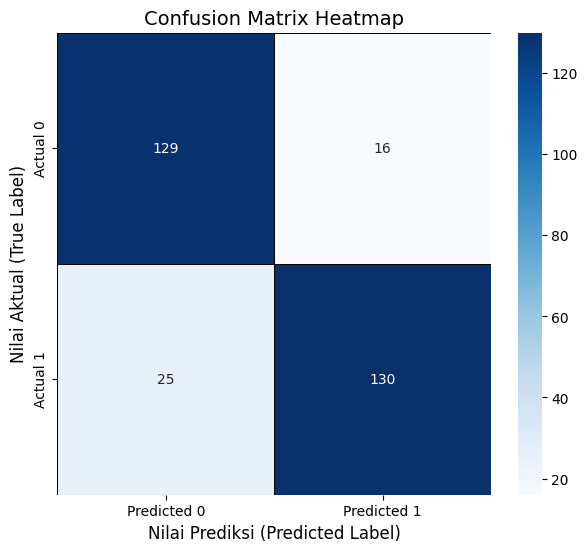

In [161]:
cm = confusion_matrix(y_test, y_pred_tuned)

# 2. Plotting Heatmap
plt.figure(figsize=(7, 6))

sns.heatmap(
    cm,
    annot=True,                # Menampilkan nilai angka di dalam sel
    fmt='d',                   # Memastikan format angka adalah bilangan bulat
    cmap='Blues',              # Pilihan colormap (bisa 'coolwarm', 'viridis', dll.)
    cbar=True,                 # Menampilkan color bar
    linewidths=.5,
    linecolor='black',
    xticklabels=['Predicted 0', 'Predicted 1'], # Label untuk sumbu X (Prediksi)
    yticklabels=['Actual 0', 'Actual 1']       # Label untuk sumbu Y (Aktual)
)

plt.ylabel('Nilai Aktual (True Label)', fontsize=12)
plt.xlabel('Nilai Prediksi (Predicted Label)', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.show()

In [159]:
# Tampilkan Classification Report
print("\n### Classification Report ###")
print(classification_report(y_test, y_pred_tuned))


### Classification Report ###
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       145
           1       0.89      0.84      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [160]:
# Hitung metrik secara spesifik
accuracy = accuracy_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned) # Default F1-score adalah 'weighted' atau 'binary' tergantung kasus
recall = recall_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)

print("\n### Ringkasan Hasil Evaluasi ###")
print(f"1. Accuracy Score (Total): {accuracy:.4f}")
print(f"2. F1-Score (Akurasi Seimbang): {f1:.4f}")
print(f"3. Recall Score (Sensitivitas): {recall:.4f}")
print(f"4. Precision Score: {precision:.4f}")


### Ringkasan Hasil Evaluasi ###
1. Accuracy Score (Total): 0.8633
2. F1-Score (Akurasi Seimbang): 0.8638
3. Recall Score (Sensitivitas): 0.8387
4. Precision Score: 0.8904


## Prediksi